In [1]:
import pandas as pd
import numpy as np
from math import sin, cos, pi, atan2, asin, sqrt
import matplotlib.pyplot as plt
from scipy import integrate
import Helper_Functions as hf

In [7]:
################## CONSTANTS ##################
# gravity
g = 9.81  # m/s^2
# m to ft
ft = 3.2884  # ft/m

################## DATA FRAME ##################
datafile = '../Data/Subscale2/VN/LOG_20220130_014355.csv'
fields = ['Timestamp', 'Pres',
  'Roll', 'Pitch', 'Yaw',
  'LinearAccelNed X', 'LinearAccelNed Y', 'LinearAccelNed Z',
  ]

df = pd.read_csv(datafile, skipinitialspace=True, usecols=fields)

################## INIT VECTORS ##################
all_time = df['Timestamp'].values

tdata = all_time
tdata = tdata - all_time[0]
L = tdata.shape[0]

ax_vn = df['LinearAccelNed X']* ft
ay_vn = df['LinearAccelNed Y']* ft
az_vn = df['LinearAccelNed Z']* -ft

accel_xyz = [ax_vn, ay_vn, az_vn]
v_vec, x_vec = hf.numerical_int(accel_xyz, tdata)

vx_vn, vy_vn, vz_vn = v_vec[0], v_vec[1], v_vec[2]
x_vn, y_vn, z_vn = x_vec[0], x_vec[1], x_vec[2]

In [ ]:
def rt_alt(P, timestamp, in_launch=0, alt_avg=0):
    '''
    Inputs:
        P: Pressure at time timestamp
        timestamp: timestamp IN SECONDS
        in_launch: boolean stating whether we are in launch or just sitting on the pad
        alt_avg: running sum and then average of the altitude before launch
    
    Outputs:
        alt: 
        in_launch: 
        alt_avg: 
    '''
    
    ft = 3.2884  # ft/m 
    #, P0=99.035, T0=288.1
    
    if in_launch:
        # Report altitude
        return (nasa_pres(P)*ft + alt_avg), 1, alt_avg
    elif nasa_pres(P) > 100:
        print("Takeoff detected!")
        # Save index or time or something
        alt_avg = alt_avg / timestamp
        in_launch = 1
        return -1, in_launch, alt_avg
    else:
        if timestamp < 10:
        # This is just the running alt
        alt_avg += nasa_pres(P)*ft
        return -1, 0, alt_avg

In [9]:
P = df['Pres']
v_NASA_pres = np.vectorize(hf.nasa_pres)
altitude_NASA_pres = v_NASA_pres(P, P0=99.035, T0=288.1)*ft# + 600
#T0 really was 303.3966... this would've been biased by the RPi tho

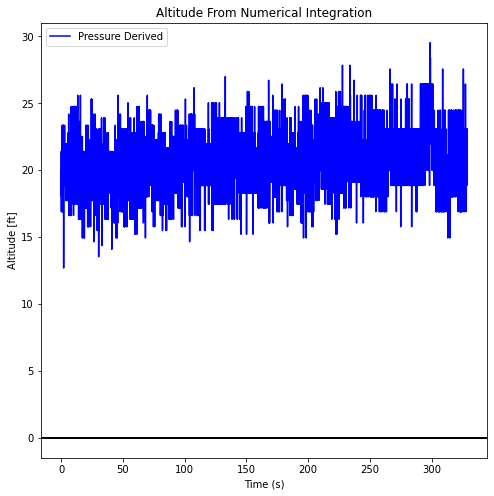

In [13]:
fig1 = plt.figure(1, figsize=(8,8))
# Just the Displacement:
ax = plt.subplot(111)
l1 = ax.plot(tdata[0:13000], altitude_NASA_pres[0:13000], color='blue', label='Pressure Derived')
#l4 = ax.plot(tdata, z_vn, color='purple', label='Numerical Integration')
l5 = plt.axhline(y=0, color='black', linewidth=2)
ax.set_title("Altitude From Numerical Integration")
ax.set_xlabel('Time (s)')
ax.set_ylabel("Altitude [ft]")
ax.legend()
plt.show()

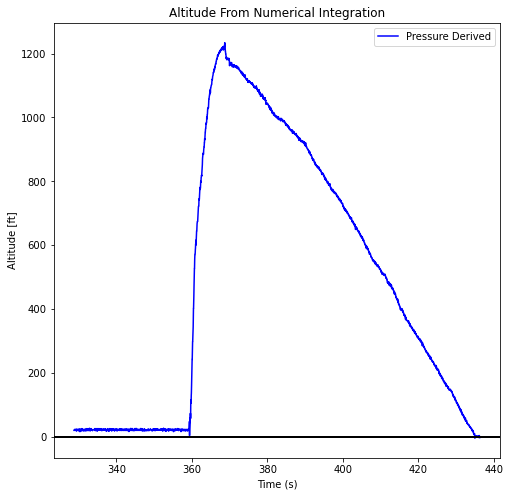

In [14]:
fig1 = plt.figure(1, figsize=(8,8))
# Just the Displacement:
ax = plt.subplot(111)
l1 = ax.plot(tdata[13000:], altitude_NASA_pres[13000:], color='blue', label='Pressure Derived')
#l4 = ax.plot(tdata, z_vn, color='purple', label='Numerical Integration')
l5 = plt.axhline(y=0, color='black', linewidth=2)
ax.set_title("Altitude From Numerical Integration")
ax.set_xlabel('Time (s)')
ax.set_ylabel("Altitude [ft]")
ax.legend()
plt.show()

In [23]:
################## CONSTANTS ##################
# gravity
g = 9.81  # m/s^2
# m to ft
ft = 3.2884  # ft/m

################## DATA FRAME ##################
datafile = '../Data/Fullscale1.csv'
fields = ['Timestamp', 'Pres',
  'Roll', 'Pitch', 'Yaw',
  'LinearAccelNed X', 'LinearAccelNed Y', 'LinearAccelNed Z',
  ]

df = pd.read_csv(datafile, skipinitialspace=True, usecols=fields)

################## INIT VECTORS ##################
all_time = df['Timestamp'].values

tdata = all_time
tdata = tdata - all_time[0]
L = tdata.shape[0]

ax_vn = df['LinearAccelNed X']* ft
ay_vn = df['LinearAccelNed Y']* ft
az_vn = df['LinearAccelNed Z']* -ft

accel_xyz = [ax_vn, ay_vn, az_vn]
v_vec, x_vec = hf.numerical_int(accel_xyz, tdata)

vx_vn, vy_vn, vz_vn = v_vec[0], v_vec[1], v_vec[2]
x_vn, y_vn, z_vn = x_vec[0], x_vec[1], x_vec[2]

In [24]:
P = df['Pres']
v_NASA_pres = np.vectorize(hf.nasa_pres)
altitude_NASA_pres = v_NASA_pres(P, P0=99.035, T0=288.1)*ft# + 600
#T0 really was 303.3966... this would've been biased by the RPi tho

In [34]:
len(P)

116467

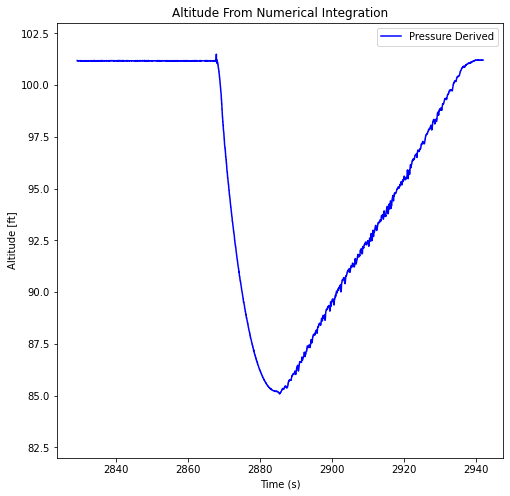

In [41]:
fig1 = plt.figure(1, figsize=(8,8))
# Just the Displacement:
ax = plt.subplot(111)
l1 = ax.plot(tdata[112000:], P[112000:], color='blue', label='Pressure Derived')
l5 = plt.axhline(y=0, color='black', linewidth=2)
ax.set_title("Altitude From Numerical Integration")
ax.set_xlabel('Time (s)')
ax.set_ylabel("Altitude [ft]")
ax.set_ylim(82,103)
ax.legend()
plt.show()

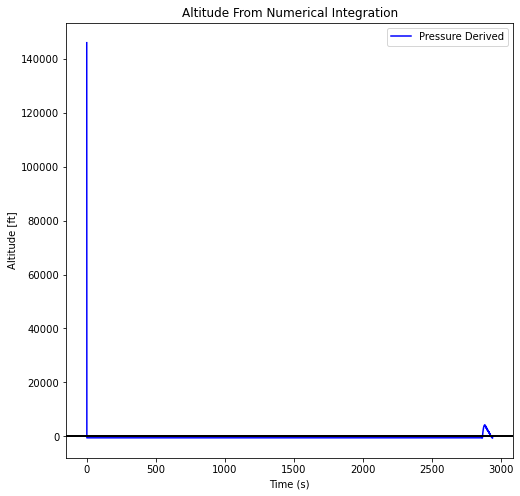

In [28]:
fig1 = plt.figure(1, figsize=(8,8))
# Just the Displacement:
ax = plt.subplot(111)
l1 = ax.plot(tdata, altitude_NASA_pres, color='blue', label='Pressure Derived')
#l4 = ax.plot(tdata, z_vn, color='purple', label='Numerical Integration')
l5 = plt.axhline(y=0, color='black', linewidth=2)
ax.set_title("Altitude From Numerical Integration")
ax.set_xlabel('Time (s)')
ax.set_ylabel("Altitude [ft]")
ax.legend()
plt.show()